In [1]:
import pandas as pd
import re
import datetime
import numpy as np

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plt.style.use('fivethirtyeight')
# plt.style.use('seaborn-pastel')
plt.style.use('bmh')

In [32]:
tweets = pd.read_csv('/03-tweets.csv', 
                      parse_dates=['datetime', 'timestamp'],
                      lineterminator='\n')

In [36]:
tweets

,datetime,timestamp,username,text,text_clean,text_glove,polarity_textblob,polarity_vader,polarity_pattern
0,2021-01-01 00:00:02+00:00,2021-01-01 00:00:00+00:00,BTCMEXGlobal,"Now is 0:00 UTC on Jan 1, 2021🎇\n\n#BTCMEX her...",now is utc on jan btcmex hereby wishes every u...,now is utc on jan 🎇 btcmex hereby wishes every...,0.521591,0.9694,0.617273
1,2021-01-01 00:00:03+00:00,2021-01-01 00:00:00+00:00,K_9Girl,#Bitcoin let's start this NEW Year! @CashApp l...,bitcoin let s start this new year let s go hap...,bitcoin let's start this new year! let's go! h...,0.213068,0.0000,0.213068
2,2021-01-01 00:00:03+00:00,2021-01-01 00:00:00+00:00,Bitstamp,Happy new year everybody! What an explosive ye...,happy new year everybody what an explosive yea...,happy new year everybody! what an explosive ye...,0.506534,0.4184,0.506534
3,2021-01-01 00:00:04+00:00,2021-01-01 00:00:00+00:00,WSJ,High fees and volatility present obstacles to ...,high fees and volatility present obstacles to ...,high fees and volatility present obstacles to ...,0.112000,0.1406,0.112000
4,2021-01-01 00:00:09+00:00,2021-01-01 00:00:00+00:00,abubakarhayus,@WAZIRIHBS @whitenigerian Because I tell you s...,because i tell you say i get bitcoin guy na li...,because i tell you say i get bitcoin? guy na ...,0.000000,0.6377,0.666667
...,...,...,...,...,...,...,...,...,...
3015181,2022-06-30 23:59:39+00:00,2022-06-30 00:00:00+00:00,Simclair2,Then show me clips of what u do 2 make #datbag...,then show me clips of what u do make datbag bi...,then show me clips of what u do make datbag bi...,0.000000,0.0000,0.000000
3015182,2022-06-30 23:59:41+00:00,2022-06-30 00:00:00+00:00,mConcepts_,@Bitcoin One of life's meaningful questions.,one of life s meaningful questions,one of life's meaningful questions.,0.500000,0.3182,0.500000
3015183,2022-06-30 23:59:44+00:00,2022-06-30 00:00:00+00:00,OfficialTravlad,"What tf is this #Bitcoin candle, looks so mani...",what tf is this bitcoin candle looks so manipu...,"what tf is this bitcoin candle, looks so manip...",0.000000,0.0000,0.000000
3015184,2022-06-30 23:59:51+00:00,2022-06-30 00:00:00+00:00,ziptrader,Niiiice bounce #bitcoin #btc as predicted at $...,niiiice bounce bitcoin btc as predicted at k i...,niiiice bounce bitcoin btc as predicted at $k....,-0.266667,0.0000,-0.266667


In [40]:
tweets.reset_index(drop=True, inplace=True)

# Get Daily Sentiment (Average)

In [41]:
tweets_by_timestamp = tweets.groupby(['timestamp'], as_index=False).mean()

In [42]:
tweets_by_timestamp

,timestamp,polarity_textblob,polarity_vader,polarity_pattern
0,2021-01-01 00:00:00+00:00,0.123346,0.184111,0.138670
1,2021-01-02 00:00:00+00:00,0.089501,0.129229,0.104355
2,2021-01-03 00:00:00+00:00,0.113127,0.161396,0.129879
3,2021-01-04 00:00:00+00:00,0.094916,0.142237,0.111807
4,2021-01-05 00:00:00+00:00,0.096888,0.151096,0.115618
...,...,...,...,...
541,2022-06-26 00:00:00+00:00,0.090201,0.113863,0.110852
542,2022-06-27 00:00:00+00:00,0.088347,0.112738,0.107927
543,2022-06-28 00:00:00+00:00,0.086705,0.103923,0.104888
544,2022-06-29 00:00:00+00:00,0.087825,0.103479,0.105177


# Percentage of Positive Tweets per Day

At first, we should calculate the number of tweets per day.

In [43]:
count = pd.DataFrame(data = tweets.timestamp.value_counts())
count.reset_index(inplace=True)
count.columns = ['timestamp', 'count_of_tweets']
tweets_by_timestamp = pd.merge(tweets_by_timestamp, count)

In [63]:
tweets_by_timestamp

,timestamp,polarity_textblob,polarity_vader,polarity_pattern,count_of_tweets
0,2021-01-01 00:00:00+00:00,0.177018,0.184111,0.138670,11610
1,2021-01-02 00:00:00+00:00,0.131362,0.129229,0.104355,34031
2,2021-01-03 00:00:00+00:00,0.154697,0.161396,0.129879,29107
3,2021-01-04 00:00:00+00:00,0.135663,0.142237,0.111807,20293
4,2021-01-05 00:00:00+00:00,0.137923,0.151096,0.115618,16887
...,...,...,...,...,...
541,2022-06-26 00:00:00+00:00,0.126194,0.113863,0.110852,11750
542,2022-06-27 00:00:00+00:00,0.118193,0.112738,0.107927,14369
543,2022-06-28 00:00:00+00:00,0.119047,0.103923,0.104888,15140
544,2022-06-29 00:00:00+00:00,0.117386,0.103479,0.105177,17213


Count Possitive tweets per Day

In [64]:
def vader_pos_or_not(sentiment):
  if (sentiment >0.05):
    return 1
  elif (sentiment < -0.05):
    return -1
  else:
    return 0

In [65]:
tweets['vader_pos_or_neg'] = tweets['polarity_vader'].map(vader_pos_or_not)

In [66]:
a = tweets.groupby('timestamp')['vader_pos_or_neg'].value_counts()

In [67]:
tweets_by_timestamp['count_vader_pos'] = a[a.reset_index(level=[0]).index==1].values
tweets_by_timestamp['count_vader_neg'] = a[a.reset_index(level=[0]).index==-1].values

In [72]:
tweets_by_timestamp['percent_vader_pos'] = tweets_by_timestamp['count_vader_pos'] / tweets_by_timestamp['count_of_tweets']
tweets_by_timestamp['percent_vader_neg'] = tweets_by_timestamp['count_vader_neg'] / tweets_by_timestamp['count_of_tweets']


In [73]:
tweets_by_timestamp

,timestamp,polarity_textblob,polarity_vader,polarity_pattern,count_of_tweets,count_vader_pos,count_vader_neg,percent_vader_pos,percent_vader_neg
0,2021-01-01 00:00:00+00:00,0.177018,0.184111,0.138670,11610,5717,2214,0.492420,0.190698
1,2021-01-02 00:00:00+00:00,0.131362,0.129229,0.104355,34031,15078,7256,0.443067,0.213217
2,2021-01-03 00:00:00+00:00,0.154697,0.161396,0.129879,29107,13966,5937,0.479816,0.203972
3,2021-01-04 00:00:00+00:00,0.135663,0.142237,0.111807,20293,9386,4305,0.462524,0.212142
4,2021-01-05 00:00:00+00:00,0.137923,0.151096,0.115618,16887,7871,3365,0.466098,0.199266
...,...,...,...,...,...,...,...,...,...
541,2022-06-26 00:00:00+00:00,0.126194,0.113863,0.110852,11750,5103,2780,0.434298,0.236596
542,2022-06-27 00:00:00+00:00,0.118193,0.112738,0.107927,14369,6227,3385,0.433363,0.235577
543,2022-06-28 00:00:00+00:00,0.119047,0.103923,0.104888,15140,6502,3742,0.429458,0.247160
544,2022-06-29 00:00:00+00:00,0.117386,0.103479,0.105177,17213,7432,4267,0.431767,0.247894


drop extra columns

In [77]:
tweets_by_timestamp.drop(['polarity_vader', 'polarity_pattern',
                          'count_vader_pos', 'count_vader_neg',
                          'count_pattern_pos'],
                         axis=1, inplace=True)

In [78]:
tweets_by_timestamp

,timestamp,polarity_textblob,count_of_tweets,percent_vader_pos,percent_vader_neg,percent_pattern_pos
0,2021-01-01 00:00:00+00:00,0.177018,11610,0.492420,0.190698,0.487941
1,2021-01-02 00:00:00+00:00,0.131362,34031,0.443067,0.213217,0.435867
2,2021-01-03 00:00:00+00:00,0.154697,29107,0.479816,0.203972,0.469750
3,2021-01-04 00:00:00+00:00,0.135663,20293,0.462524,0.212142,0.457005
4,2021-01-05 00:00:00+00:00,0.137923,16887,0.466098,0.199266,0.454847
...,...,...,...,...,...,...
541,2022-06-26 00:00:00+00:00,0.126194,11750,0.434298,0.236596,0.433532
542,2022-06-27 00:00:00+00:00,0.118193,14369,0.433363,0.235577,0.434686
543,2022-06-28 00:00:00+00:00,0.119047,15140,0.429458,0.247160,0.430515
544,2022-06-29 00:00:00+00:00,0.117386,17213,0.431767,0.247894,0.433219


# Frequency of Tweets

Crawl number of tweets (daily) from: https://bitinfocharts.com/comparison/bitcoin-tweets.html#3y

In [83]:
start_date = tweets_by_timestamp.timestamp[0].date()
end_date = tweets_by_timestamp.timestamp.iloc[-1].date()

In [135]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import re

def to_num(val):
  try:
    return int(val)
  except:
    return np.nan

def parse_strlist(sl):
    clean = re.sub("[\[\],\s]","",sl)
    splitted = re.split("[\'\"]",clean)
    values_only = [s for s in splitted if s != '']
    return values_only


url = 'https://bitinfocharts.com/comparison/bitcoin-tweets.html#3y'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

scripts = soup.find_all('script')
for script in scripts:
    if 'd = new Dygraph(document.getElementById("container")' in script.text:
        StrList = script.text
        StrList = '[[' + StrList.split('[[')[-1]
        StrList = StrList.split(']]')[0] +']]'
        StrList = StrList.replace("new Date(", '').replace(')','')
        dataList = parse_strlist(StrList)

date = []
tweet = []
for each in dataList:
    if (dataList.index(each) % 2) == 0:
        date.append(each)
    else:
        tweet.append(each)

df = pd.DataFrame(list(zip(pd.to_datetime(date), list(map(to_num, tweet)))), columns=["Date","Bitcoin - Tweets"]).set_index('Date')

In [168]:
tweets_by_timestamp['count_of_tweets'] = df[(df.index >= str(start_date)) & (df.index <= str(end_date))].values

Text(0, 0.5, 'Number of Tweets')

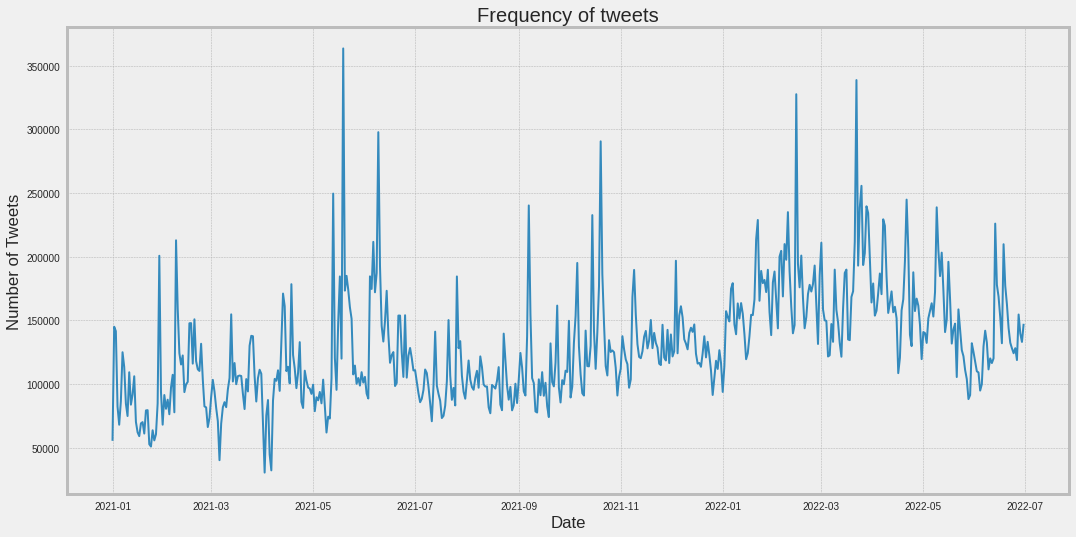

In [52]:
plt.figure(figsize=(16,8))
plt.title('Frequency of tweets')
plt.plot(tweets_by_timestamp['timestamp'], tweets_by_timestamp['count_of_tweets'])
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Bitcoin Candle Indicators

## Download BTC data

In [9]:
%%capture
!pip install yfinance

In [10]:
import yfinance as yf
from datetime import timedelta

In [11]:
start_date = tweets_by_timestamp.timestamp[0]
end_date = tweets_by_timestamp.timestamp.iloc[-1]

In [12]:
freq = '1d'
btc = yf.download('BTC-USD',
                  start_date - timedelta(1),
                  end_date + timedelta(1),
                  interval=freq
                  # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
                  # (optional, default is '1d')
                 )

[*********************100%***********************]  1 of 1 completed


In [13]:
btc.reset_index(inplace=True)

## Calculate Candle Indicators

In [12]:
btc['next_close_label'] = [1 if i>0 else 0 for i in btc['Close'].pct_change().shift(-1)]
btc['next_open_label'] = [1 if i>0 else 0 for i in btc['Open'].pct_change().shift(-1)]

In [15]:
btc['next_close']=btc['Close'].shift(-1)

In [15]:
btc['next_return'] = btc['Close'].pct_change().shift(-1)

In [13]:
btc = btc.rename(columns = {"Date" : "timestamp"})
btc['timestamp'] = pd.to_datetime(btc['timestamp'])

In [21]:
btc['hlco_ratio'] = (btc['High'] - btc['Low'])/np.abs((btc['Close']-btc['Open']))
btc['upper_shadow'] = btc['High'] - np.maximum(btc['Close'], btc['Open'])
btc['lower_shadow'] = np.minimum(btc['Close'], btc['Open']) - btc['Low']

In [22]:
btc

,Date,Open,High,Low,Close,Adj Close,Volume,next_return,hlco_ratio,upper_shadow,lower_shadow
0,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848,0.012842,6.512068,243.156250,639.582031
1,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,0.093726,2.096690,226.474609,190.423828
2,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.020380,1.477358,1027.849609,285.273438
3,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,-0.024712,3.916921,1826.535156,77.091797
4,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,0.063197,5.622485,629.269531,3249.158203
...,...,...,...,...,...,...,...,...,...,...,...
543,2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707,-0.021936,2.930357,449.851562,115.279297
544,2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,21381535161,-0.008708,2.074940,432.878906,51.822266
545,2022-06-29,20281.169922,20364.156250,19937.791016,20104.023438,20104.023438,23552740328,-0.015882,2.406851,82.986328,166.232422
546,2022-06-30,20108.312500,20141.160156,18729.656250,19784.726562,19784.726562,26267239923,-0.026048,4.362068,32.847656,1055.070312


Concatenation

In [26]:
tweets_by_timestamp

,timestamp,polarity_textblob,count_of_tweets,percent_vader_pos,percent_vader_neg,percent_pattern_pos,Volume,Open,next_open_label,Close,...,DoW_Wednesday,wikiviews_bitcoin,wikiviews_cryptocurrency,High,Low,next_close,next_return,hlco_ratio,upper_shadow,lower_shadow
0,2021-01-01 00:00:00+00:00,0.177018,55480.0,0.492420,0.190698,0.487941,40730301359,28994.009766,1,29374.152344,...,0,13774,6374,29600.626953,28803.585938,32127.267578,0.093726,2.096690,226.474609,190.423828
1,2021-01-02 00:00:00+00:00,0.131362,145059.0,0.443067,0.213217,0.435867,67865420765,29376.455078,1,32127.267578,...,0,30157,11939,33155.117188,29091.181641,32782.023438,0.020380,1.477358,1027.849609,285.273438
2,2021-01-03 00:00:00+00:00,0.154697,141596.0,0.479816,0.203972,0.469750,78665235202,32129.408203,1,32782.023438,...,0,43194,14554,34608.558594,32052.316406,31971.914062,-0.024712,3.916921,1826.535156,77.091797
3,2021-01-04 00:00:00+00:00,0.135663,82412.0,0.462524,0.212142,0.457005,81163475344,32810.949219,0,31971.914062,...,0,34344,13487,33440.218750,28722.755859,33992.429688,0.063197,5.622485,629.269531,3249.158203
4,2021-01-05 00:00:00+00:00,0.137923,68133.0,0.466098,0.199266,0.454847,67547324782,31977.041016,1,33992.429688,...,0,27838,11945,34437.589844,30221.187500,36824.363281,0.083311,2.092104,445.160156,1755.853516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2022-06-26 00:00:00+00:00,0.126194,118914.0,0.434298,0.236596,0.433532,18027170497,21496.494141,0,21027.294922,...,0,5587,3663,21783.724609,21016.269531,20735.478516,-0.013878,1.635670,287.230469,11.025391
542,2022-06-27 00:00:00+00:00,0.118193,154658.0,0.433363,0.235577,0.434686,20965695707,21028.238281,0,20735.478516,...,0,7466,4298,21478.089844,20620.199219,20280.634766,-0.021936,2.930357,449.851562,115.279297
543,2022-06-28 00:00:00+00:00,0.119047,139768.0,0.429458,0.247160,0.430515,21381535161,20731.544922,0,20280.634766,...,0,7331,4375,21164.423828,20228.812500,20104.023438,-0.008708,2.074940,432.878906,51.822266
544,2022-06-29 00:00:00+00:00,0.117386,133115.0,0.431767,0.247894,0.433219,23552740328,20281.169922,0,20104.023438,...,1,7000,4065,20364.156250,19937.791016,19784.726562,-0.015882,2.406851,82.986328,166.232422


In [25]:
pd.concat([tweets_by_timestamp,btc[['next_return','hlco_ratio', 'upper_shadow', 'lower_shadow']][1:-1].reset_index(drop=True)], axis=1)

In [63]:
# pd.concat([tweets_by_timestamp,btc[['timestamp', 'Volume', 'Open', 'next_close_label']][1:-1].reset_index()], axis=1)
tweets_by_timestamp = pd.concat([tweets_by_timestamp,btc[['Volume','Open', 'next_open_label', 'Close', 'next_close', 'next_close_label','High','Low']][1:-1].reset_index(drop=True)], axis=1)
tweets_by_timestamp.drop('index', axis=1)
tweets_by_timestamp

,timestamp,polarity_textblob,count_of_tweets,percent_vader_pos,percent_vader_neg,percent_pattern_pos,index,Volume,Open,next_open_label,Close,next_close_label
0,2021-01-01 00:00:00+00:00,0.177018,55480.0,0.492420,0.190698,0.487941,1,40730301359,28994.009766,1,29374.152344,1
1,2021-01-02 00:00:00+00:00,0.131362,145059.0,0.443067,0.213217,0.435867,2,67865420765,29376.455078,1,32127.267578,1
2,2021-01-03 00:00:00+00:00,0.154697,141596.0,0.479816,0.203972,0.469750,3,78665235202,32129.408203,1,32782.023438,0
3,2021-01-04 00:00:00+00:00,0.135663,82412.0,0.462524,0.212142,0.457005,4,81163475344,32810.949219,0,31971.914062,1
4,2021-01-05 00:00:00+00:00,0.137923,68133.0,0.466098,0.199266,0.454847,5,67547324782,31977.041016,1,33992.429688,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541,2022-06-26 00:00:00+00:00,0.126194,118914.0,0.434298,0.236596,0.433532,542,18027170497,21496.494141,0,21027.294922,0
542,2022-06-27 00:00:00+00:00,0.118193,154658.0,0.433363,0.235577,0.434686,543,20965695707,21028.238281,0,20735.478516,0
543,2022-06-28 00:00:00+00:00,0.119047,139768.0,0.429458,0.247160,0.430515,544,21381535161,20731.544922,0,20280.634766,0
544,2022-06-29 00:00:00+00:00,0.117386,133115.0,0.431767,0.247894,0.433219,545,23552740328,20281.169922,0,20104.023438,0


Text(0, 0.5, 'Close Price')

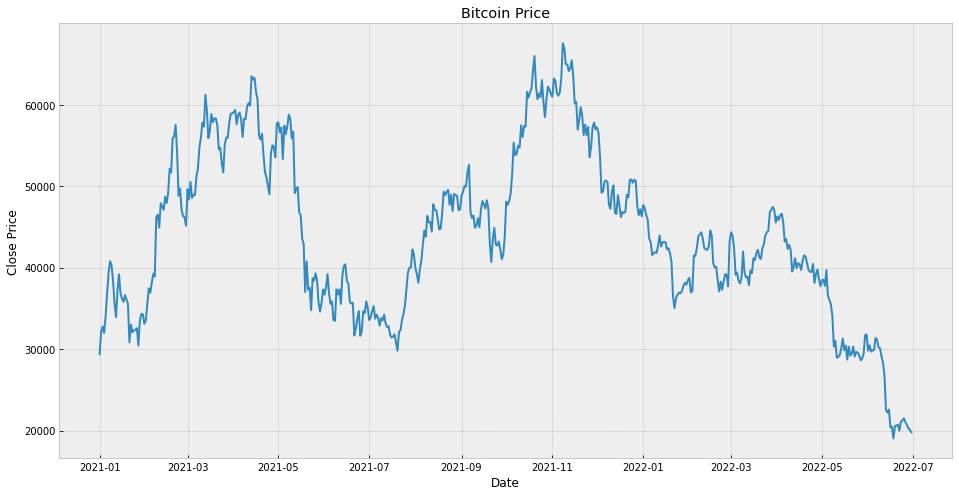

In [10]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin Price')
plt.plot(tweets_by_timestamp['timestamp'], tweets_by_timestamp['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')

In [17]:
tweets_by_timestamp['next_close_label'].value_counts()

1    274
0    272
Name: next_close_label, dtype: int64

Text(0, 0.5, 'Number of Instances')

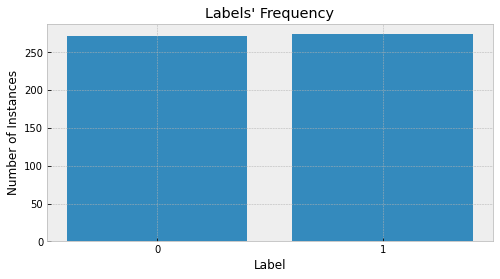

In [75]:
plt.figure(figsize=(8,4))
plt.title("Labels' Frequency")
plt.bar(tweets_by_timestamp['next_close_label'].value_counts().index, 
        tweets_by_timestamp['next_close_label'].value_counts())
plt.xlabel('Label')
plt.xticks([0,1])
plt.ylabel('Number of Instances')

# Google Trends

In [77]:
%%capture
!pip install pytrends

In [78]:
from pytrends.request import TrendReq

In [79]:
from pytrends.request import TrendReq
from pytrends import dailydata

df = dailydata.get_daily_data('bitcoin', 2020, 12, 2022, 7, geo = '')

bitcoin:2020-12-01 2020-12-31
bitcoin:2021-01-01 2021-01-31
bitcoin:2021-02-01 2021-02-28
bitcoin:2021-03-01 2021-03-31
bitcoin:2021-04-01 2021-04-30
bitcoin:2021-05-01 2021-05-31
bitcoin:2021-06-01 2021-06-30
bitcoin:2021-07-01 2021-07-31
bitcoin:2021-08-01 2021-08-31
bitcoin:2021-09-01 2021-09-30
bitcoin:2021-10-01 2021-10-31
bitcoin:2021-11-01 2021-11-30
bitcoin:2021-12-01 2021-12-31
bitcoin:2022-01-01 2022-01-31
bitcoin:2022-02-01 2022-02-28
bitcoin:2022-03-01 2022-03-31
bitcoin:2022-04-01 2022-04-30
bitcoin:2022-05-01 2022-05-31
bitcoin:2022-06-01 2022-06-30
bitcoin:2022-07-01 2022-07-31


Text(0, 0.5, 'Interest over time')

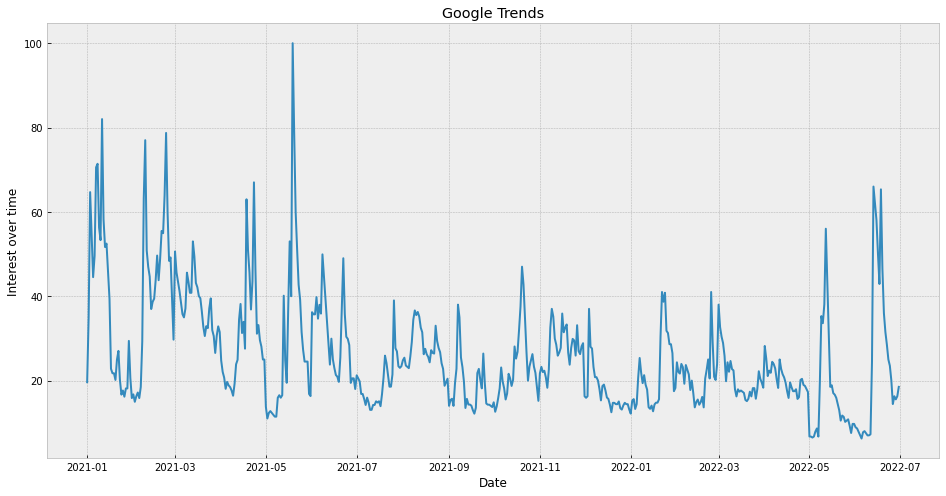

In [13]:
plt.figure(figsize=(16,8))
plt.title('Google Trends')
plt.plot(tweets_by_timestamp['timestamp'], tweets_by_timestamp['trends_bitcoin'])
plt.xlabel('Date')
plt.ylabel('Interest over time')

In [82]:
df.reset_index(inplace=True)

In [87]:
df[(df.date.dt.date>=start_date) & (df.date.dt.date<=end_date)].reset_index()[['date', 'bitcoin']]

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,date,bitcoin
0,2021-01-01,19.61
1,2021-01-02,34.98
2,2021-01-03,64.68
3,2021-01-04,54.60
4,2021-01-05,44.52
...,...,...
541,2022-06-26,14.43
542,2022-06-27,16.28
543,2022-06-28,15.54
544,2022-06-29,16.28


In [88]:
tweets_by_timestamp = pd.concat([tweets_by_timestamp,
           df[(df.date.dt.date>=start_date) & (df.date.dt.date<=end_date)].reset_index()[['bitcoin']]], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [91]:
tweets_by_timestamp.rename(columns={'bitcoin':'trends_bitcoin'}, inplace=True)

# Fear & Greed Index

In [97]:
from datetime import datetime

In [92]:
import requests

In [93]:
BASE_URL ="https://api.alternative.me/fng/?limit=0"
START_DATE = '2021-01-01'

In [94]:
resp = requests.get(BASE_URL)

In [95]:
fear_greed = pd.DataFrame(resp.json()['data'])

In [98]:
fear_greed['date'] = fear_greed['timestamp'].map(lambda x:datetime.fromtimestamp(int(x)))

In [99]:
fear_and_greed = fear_greed[(fear_greed.date.dt.date >= start_date) & (fear_greed.date.dt.date <= end_date)]

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [100]:
fear_and_greed

,value,value_classification,timestamp,time_until_update,date
24,11,Extreme Fear,1656547200,NaN,2022-06-30
25,13,Extreme Fear,1656460800,NaN,2022-06-29
26,10,Extreme Fear,1656374400,NaN,2022-06-28
27,12,Extreme Fear,1656288000,NaN,2022-06-27
28,14,Extreme Fear,1656201600,NaN,2022-06-26
...,...,...,...,...,...
565,93,Extreme Greed,1609804800,NaN,2021-01-05
566,94,Extreme Greed,1609718400,NaN,2021-01-04
567,93,Extreme Greed,1609632000,NaN,2021-01-03
568,94,Extreme Greed,1609545600,NaN,2021-01-02


In [101]:
fear_and_greed.sort_values('date', inplace=True)
fear_and_greed.reset_index(inplace=True)
fear_and_greed.drop(['index','time_until_update', 'timestamp'], axis=1, inplace=True)
fear_and_greed.rename(columns = {"Date" : "timestamp",
                                 "value_classification": "fear_greed_class",
                                 "value":"fear_greed_value"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [102]:
fear_and_greed

,fear_greed_value,fear_greed_class,date
0,94,Extreme Greed,2021-01-01
1,94,Extreme Greed,2021-01-02
2,93,Extreme Greed,2021-01-03
3,94,Extreme Greed,2021-01-04
4,93,Extreme Greed,2021-01-05
...,...,...,...
541,14,Extreme Fear,2022-06-26
542,12,Extreme Fear,2022-06-27
543,10,Extreme Fear,2022-06-28
544,13,Extreme Fear,2022-06-29


In [103]:
tweets_by_timestamp = pd.concat([tweets_by_timestamp,fear_and_greed[['fear_greed_class', 'fear_greed_value']]], axis=1)

Text(0.5, 0, 'Date')

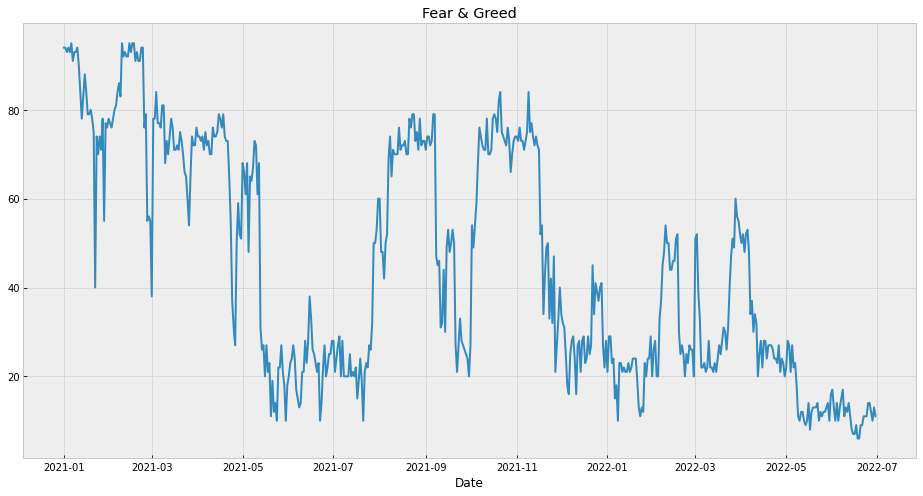

In [14]:
plt.figure(figsize=(16,8))
plt.title('Fear & Greed')
plt.plot(tweets_by_timestamp['timestamp'], tweets_by_timestamp['fear_greed_value'])
plt.xlabel('Date')
# plt.ylabel('Interest over time')

# Day of Week dummy

In [125]:
tweets_by_timestamp = pd.concat([tweets_by_timestamp,
           pd.get_dummies(tweets_by_timestamp['timestamp'].dt.day_name(), prefix='DoW')], axis=1) #, drop_first=True

In [12]:
tweets_by_timestamp['is_weekend'] = tweets_by_timestamp['timestamp'].dt.day_name().isin(['Saturday', 'Sunday']).astype(int)

In [8]:
tweets_by_timestamp = pd.read_csv('/content/gdrive/MyDrive/snscrape_clean/03-tweets_by_timestamp-2.csv',
                                  parse_dates=['timestamp'])

In [73]:
dow_volume = (tweets_by_timestamp[['DoW_Friday',
       'DoW_Monday', 'DoW_Saturday', 'DoW_Sunday', 'DoW_Thursday',
       'DoW_Tuesday', 'DoW_Wednesday']].mul(tweets_by_timestamp[['Volume']].values, axis=0).sum()/1000000000)\
       .reindex(index = ['DoW_Saturday','DoW_Sunday','DoW_Monday','DoW_Tuesday','DoW_Wednesday','DoW_Thursday','DoW_Friday'])

Text(0, 0.5, 'Volume (billion dollars)')

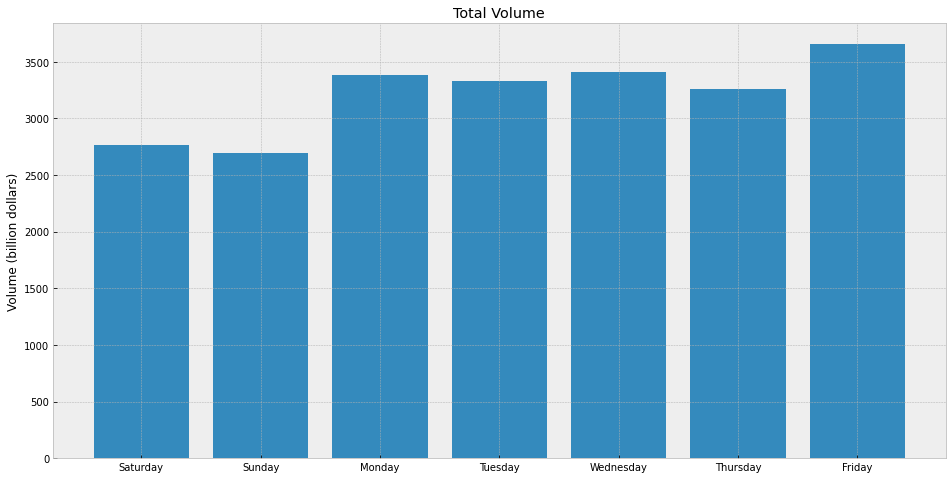

In [74]:
plt.figure(figsize=(16,8))
plt.title('Total Volume')
plt.bar(['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday',  'Thursday', 'Friday'],
        dow_volume)
plt.ylabel("Volume (billion dollars)")

In [78]:
tweets_by_timestamp.drop('DoW_Friday', axis=1, inplace=True)

# Wikipedia Page Views

download wikipedia pageviews:

https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2021-01-01&end=2022-07-21&pages=Bitcoin|Cryptocurrency

In [79]:
wiki_views=pd.read_csv('/content/gdrive/MyDrive/snscrape_clean/pageviews-20210101-20220721.csv')

In [91]:
wiki_views = wiki_views[(wiki_views.Date >= str(start_date)) & (wiki_views.Date <= str(end_date))][['Bitcoin','Cryptocurrency']]\
           .rename(columns={'Bitcoin':'wikiviews_bitcoin',
                            'Cryptocurrency':'wikiviews_cryptocurrency'}).reset_index(drop=True)

In [93]:
tweets_by_timestamp = pd.concat([tweets_by_timestamp,
                                 wiki_views],
                                axis=1)

Text(0, 0.5, 'Number of Views')

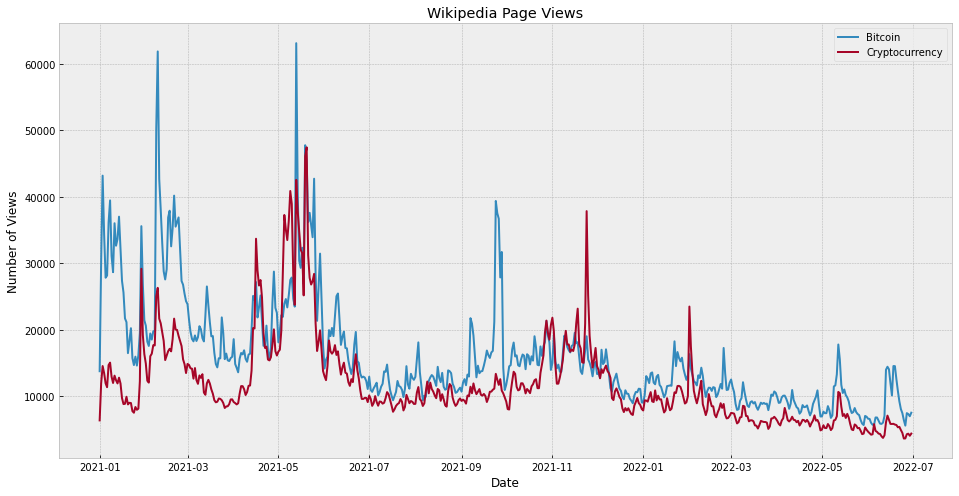

In [98]:
plt.figure(figsize=(16,8))
plt.title('Wikipedia Page Views')
# plt.plot(tweets_by_timestamp['timestamp'], tweets_by_timestamp[['wikiviews_bitcoin', 'wikiviews_cryptocurrency']])
plt.plot(tweets_by_timestamp['timestamp'], tweets_by_timestamp['wikiviews_bitcoin'], label='Bitcoin')
plt.plot(tweets_by_timestamp['timestamp'], tweets_by_timestamp['wikiviews_cryptocurrency'], label='Cryptocurrency')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Views')

In [5]:
tweets_by_timestamp

,timestamp,polarity_textblob,count_of_tweets,percent_vader_pos,percent_vader_neg,percent_pattern_pos,Volume,Open,next_open_label,Close,...,DoW_Wednesday,wikiviews_bitcoin,wikiviews_cryptocurrency,High,Low,next_close,next_return,hlco_ratio,upper_shadow,lower_shadow
0,2021-01-01 00:00:00+00:00,0.177018,55480.0,0.492420,0.190698,0.487941,40730301359,28994.009766,1,29374.152344,...,0,13774,6374,29600.626953,28803.585938,32127.267578,0.093726,2.096690,226.474609,190.423828
1,2021-01-02 00:00:00+00:00,0.131362,145059.0,0.443067,0.213217,0.435867,67865420765,29376.455078,1,32127.267578,...,0,30157,11939,33155.117188,29091.181641,32782.023438,0.020380,1.477358,1027.849609,285.273438
2,2021-01-03 00:00:00+00:00,0.154697,141596.0,0.479816,0.203972,0.469750,78665235202,32129.408203,1,32782.023438,...,0,43194,14554,34608.558594,32052.316406,31971.914062,-0.024712,3.916921,1826.535156,77.091797
3,2021-01-04 00:00:00+00:00,0.135663,82412.0,0.462524,0.212142,0.457005,81163475344,32810.949219,0,31971.914062,...,0,34344,13487,33440.218750,28722.755859,33992.429688,0.063197,5.622485,629.269531,3249.158203
4,2021-01-05 00:00:00+00:00,0.137923,68133.0,0.466098,0.199266,0.454847,67547324782,31977.041016,1,33992.429688,...,0,27838,11945,34437.589844,30221.187500,36824.363281,0.083311,2.092104,445.160156,1755.853516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2022-06-26 00:00:00+00:00,0.126194,118914.0,0.434298,0.236596,0.433532,18027170497,21496.494141,0,21027.294922,...,0,5587,3663,21783.724609,21016.269531,20735.478516,-0.013878,1.635670,287.230469,11.025391
542,2022-06-27 00:00:00+00:00,0.118193,154658.0,0.433363,0.235577,0.434686,20965695707,21028.238281,0,20735.478516,...,0,7466,4298,21478.089844,20620.199219,20280.634766,-0.021936,2.930357,449.851562,115.279297
543,2022-06-28 00:00:00+00:00,0.119047,139768.0,0.429458,0.247160,0.430515,21381535161,20731.544922,0,20280.634766,...,0,7331,4375,21164.423828,20228.812500,20104.023438,-0.008708,2.074940,432.878906,51.822266
544,2022-06-29 00:00:00+00:00,0.117386,133115.0,0.431767,0.247894,0.433219,23552740328,20281.169922,0,20104.023438,...,1,7000,4065,20364.156250,19937.791016,19784.726562,-0.015882,2.406851,82.986328,166.232422


# Save data

Merging and saving all data

In [1]:
data = pd.merge(tweets_by_timestamp, btc , on='Timestamp', how='inner')
data = pd.merge(data, google_trends , on='Timestamp', how='inner')
data.to_csv('data.csv')